# Machine Learning - Principal Component Analysis (PCA) and Eigenvalue/Eigenvector

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Power Iteration Method

In [ ]:
def power_iteration(A, t):
  '''
  A: matrix with eigenvalues with different magnitudes
  t: number of iterations
  '''

  n = A.shape[1] # n by n matrix의 열 크기

  # initial vector
  x = np.ones(n)

  # loop
  for i in range(t):
    x = A@x
    x = x / np.linalg.norm(x)

  eigen_value = ((A@x).T @ x) / (x.T @ x)

  return eigen_value, x.reshape(n, 1)

In [ ]:
A = np.array([2, -12, 1, -5]).reshape(2, 2)

In [ ]:
power_iteration(A, 6)

(-2.0137264303475653,
 array([[0.94834884],
        [0.31722937]]))

# Deflation Method using Power Iteration to Extract Eigenvalues

In [ ]:
def power_iteration_with_deflation(A, t, num_eigen):

  eval_list = []
  evec_list = []

  for i in range(num_eigen):
    eval, evec = power_iteration(A,t)
    A = A - eval * evec @ evec.T
    eval_list.append(eval)
    evec_list.append(evec)

  return eval_list, evec_list

In [ ]:
# using numpy library to get eigenvalue and eigenvector
eval, evec = power_iteration_with_deflation(A, 100, 2)
print(eval)
print(evec)

[-2.0000000000000004, -0.9999999999999982]
[array([[0.9486833 ],
       [0.31622777]]), array([[0.92163538],
       [0.388057  ]])]


In [ ]:
# using numpy library to get eigenvalue and eigenvector
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[-1. -2.]
[[0.9701425  0.9486833 ]
 [0.24253563 0.31622777]]


# Principal Component Analysis (PCA)

In [ ]:
def PCA(D, k):
  '''
  D: data matrix packed row-wise
  k: reduced dimension
  '''

  # D: n by d matrix
  n = len(D)
  d = D.shape[1]

  # first, find the mean mu
  mu = np.sum(D, axis=0) / n
  mu = mu.reshape((d,1))

  # Z: centered matrix
  Z = D - np.ones((n, 1)) @ mu.T

  # find covariance
  cov = Z.T @ Z * (1/n)


  # find eigenvalue and eigenvector of a covariance matrix
  eval, evec = np.linalg.eig(cov)

  # sort the eigenvalue and eigenvector
  sorted_list = np.argsort(np.abs(eval))[::-1]
  sorted_eval = eval[sorted_list]
  sorted_evec = evec[:, sorted_list]

  # pick k eigenvectors
  U = evec[:, :k]

  # reduced matrix
  reduced_matrix = D @ U


  return reduced_matrix


In [ ]:
# load iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [ ]:
# change label to numerical values # 종류를 0,1,2 로 바꾸기
df.replace("Iris-setosa", 0, inplace=True)
df.replace("Iris-versicolor", 1, inplace=True)
df.replace("Iris-virginica", 2, inplace=True)

In [ ]:
# split iris data with data part and label part
D = df.iloc[:, :4]
D = D.to_numpy()
iris_type = df.iloc[:, 4].to_numpy()

In [ ]:
# perform PCA algorithm
### !!!
# 이렇게 PCA 뽑고
reduced_matrix = PCA(D, k=2)

Text(0.5, 1.0, 'iris data shown after PCA with k=2')

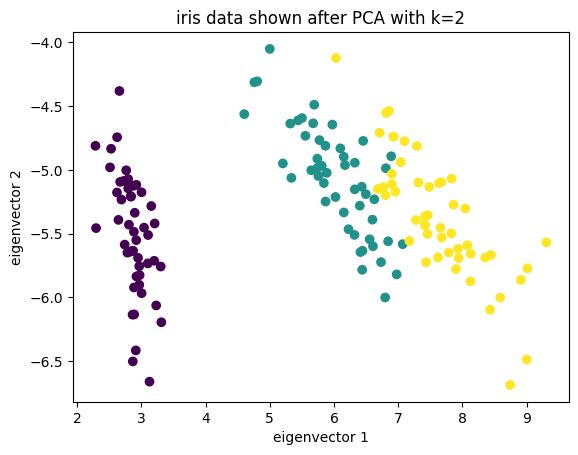

In [ ]:
# draw iris data with reduced dimensionality
##########!!!!!!!!!!!!!!!
# 이렇게 PCA 뽑고
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=iris_type)
plt.xlabel("eigenvector 1")
plt.ylabel("eigenvector 2")
plt.title("iris data shown after PCA with k=2")

#### 테스트 데이터 나누기
####